In [188]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

A ***Poisson distribution*** is a model of the number of events occuring within a given period of time.

$X_1 \sim \text{poisson}(\lambda_1=10): \Pr(X_1=x_1) = {\frac {\lambda_1^{x_1}e^{-\lambda_1 }}{x_1!}}$

$X_2 \sim \text{poisson}(\lambda_2=20): \Pr(X_2=x_2) = {\frac {\lambda_2^{x_2}e^{-\lambda_2 }}{x_2!}}$

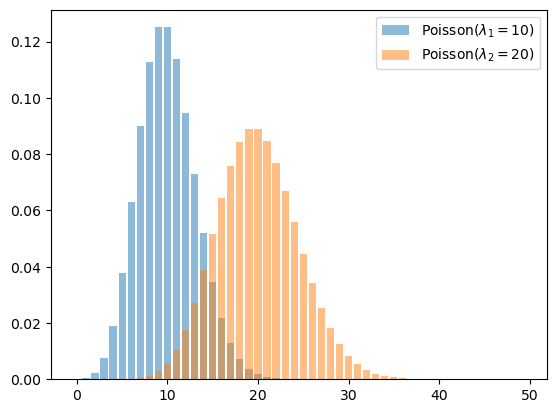

In [189]:
n=10000; lambda1 = 10; lambda2 = 20
support = np.arange(0,50,dtype=int)
plt.bar(x=support, height=stats.poisson(mu=lambda1).pmf(support), alpha=0.5, label="Poisson($\\lambda_1=10$)")
plt.bar(x=support, height=stats.poisson(mu=lambda2).pmf(support), alpha=0.5, label="Poisson($\\lambda_2=20$)")
plt.legend();

If $x = 10$

what's $\Pr(X_1 \leq x)$?

In [191]:
cumsum = 0 
for x in range(11):
    cumsum += stats.poisson(mu=lambda1).pmf(x)
cumsum    

0.5830397501929867

In [193]:
stats.poisson(mu=lambda1).pmf([0,1,2,3,4,5,6,7,8,9,10]).sum()

0.5830397501929867

In [194]:
stats.poisson(mu=lambda1).cdf(10)

0.5830397501929852

In [200]:
(stats.poisson(mu=lambda1).rvs(100000)<=10).mean()

0.58348

If $n=100000$ and $x=10$

what's $\Pr\left(\frac{X_1}{n} \leq \frac{x}{n}\right)$?

In [201]:
(stats.poisson(mu=lambda1).rvs(100000)<=10).mean()

0.58255

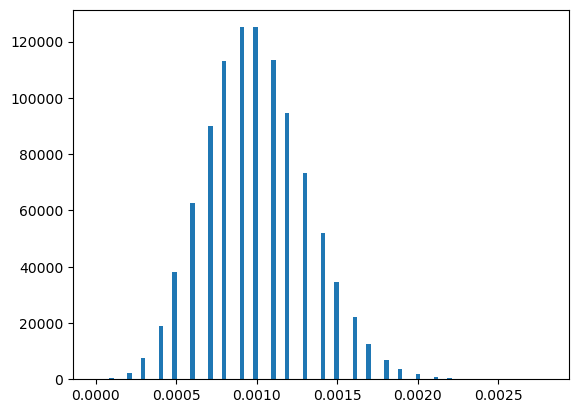

In [206]:
plt.hist(stats.poisson(mu=lambda1).rvs(1000000)/n, bins=100);

What's the distribution of $\frac{X_{1}}{n}$?

Hint: $n$ is not a random variable and this is not $\sum_{i=1}^n\frac{X_{1i}}{n}$

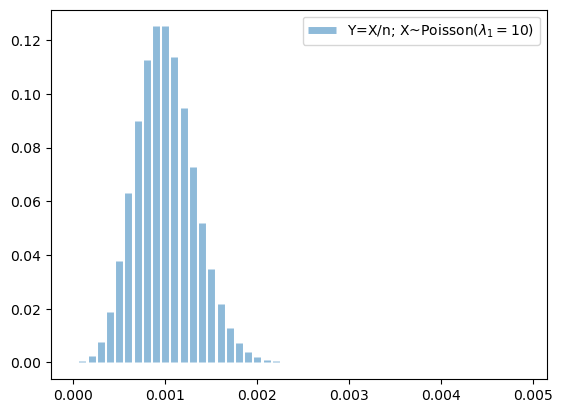

In [66]:
plt.vlines(x=support/n, ymin=0, ymax=stats.poisson(mu=lambda1).pmf(support), alpha=0.5, linewidth=5, label="Y=X/n; X~Poisson($\\lambda_1=10$)")
plt.legend();

What is $\Pr(X_1, X_2)$? 

Is it  $\Pr(X_1, X_2) = \Pr(X_1)\Pr(X_2)$ ?

How can you sample from $p(X_1, X_2)$?  

Generally, if you have samples from $p(X_1, X_2)$ then do you have samples from $p(X_1)$ and $p(X_2)$?

What is $\Pr(X_1<X_2)$?

In [207]:
# What is the chance that 
# stats.poisson(mu=lambda1).rvs(1) < stats.poisson(mu=lambda2).rvs(1) ?
# Hint: use simulation...

(stats.poisson(mu=lambda1).rvs(n) < stats.poisson(mu=lambda2).rvs(n)).mean()

0.9616

In [210]:
np.c_[stats.poisson(mu=lambda1).rvs(n),stats.poisson(mu=lambda2).rvs(n)]

array([[10, 13],
       [ 8, 24],
       [ 7, 27],
       ...,
       [ 6, 25],
       [10, 27],
       [16, 22]])

\begin{align*}
\Pr(X_1 < X_2) = {} & \int_0^\infty \left( \int_{k}^\infty  {\frac {\lambda_2^{x_2}e^{-\lambda_2 }}{x_2!}} d x_2 \right) {\frac {\lambda_1^{x_1}e^{-\lambda_1 }}{x_1!}}  d x_1 \\ ={}& \int_0^\infty \int_{0}^\infty 1_{[x_1<x_2]}(x_1,x_2) {\frac {\lambda_2^{x_2}e^{-\lambda_2 }}{x_2!}}  {\frac {\lambda_1^{x_1}e^{-\lambda_1 }}{x_1!}} d x_2 d x_1 = E_{X_1,X_2}[1_{[x_1<x_2]}(x_1,x_2)] \\
{} & \hspace{3.5in} \rightarrow  \frac{1}{n}\sum_{i=1}^n 1_{[x_{1i}<x_{2i}]}(x_{1i},x_{2i})
\end{align*}



What is the distribution of $p(X_1<X_2)$?

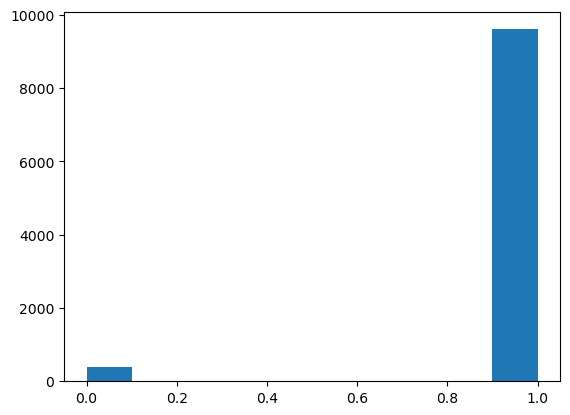

In [215]:
plt.hist((stats.poisson(mu=lambda1).rvs(n)<stats.poisson(mu=lambda2).rvs(n)).astype(int));

In [ ]:
# What is the distribution of 
# stats.poisson(mu=lambda1).rvs(1) > stats.poisson(mu=lambda2) ?
# Hint: use simulation...

What is the distribution of $p\left(\frac{X_1}{X_2}\right)$?

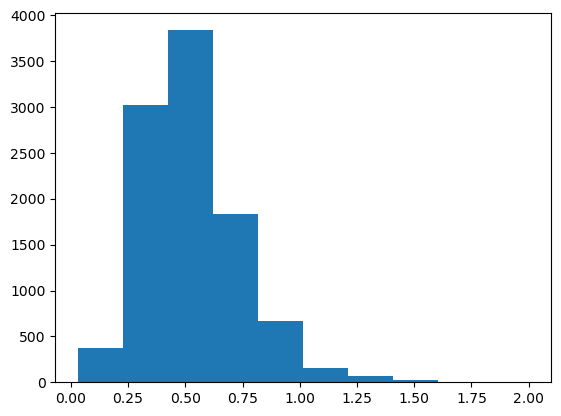

In [219]:
# What is the distribution of 
# stats.poisson(mu=lambda1).rvs(1) / stats.poisson(mu=lambda2) ?
# Hint: use simulation...

# CDF Pr(X<=x)

np.c_[stats.poisson(mu=lambda1).rvs(n),stats.poisson(mu=lambda2).rvs(n)]

plt.hist(stats.poisson(mu=lambda1).rvs(n)/stats.poisson(mu=lambda2).rvs(n));

\begin{align*}
\Pr\left(\frac{X_1}{X_2} \leq c\right) = \int_0^\infty\int_0^\infty 1_{\left[\frac{x_1}{x_2} \leq c\right]}(x_1,x_2)  {\frac {\lambda_1^{k}e^{-\lambda_1 }}{k!}} {\frac {\lambda_2^{k'}e^{-\lambda_2 }}{k'!}} d x_1 d x_1 = {} & E_{X_1,X_2}\left[1_{\left[\frac{X_1}{X_2} \leq c\right]}(X_1,X_2)\right] \\
\rightarrow {} & \frac{1}{n}\sum_{i=1}^n 1_{\left[\frac{x_{1i}}{x_{2i}} \leq c\right]}(x_{1i},x_{2i})
\end{align*}

Can you provide an interval $[a,b]$ for which you think $\Pr\left(a \leq \frac{X_1}{X_2} \leq b\right) = 0.95$ ?

So we want $a$ and $b$ such that $\Pr\left(\frac{X_1}{X_2} < a\right) = 0.025$ and $\Pr\left(\frac{X_1}{X_2} \leq b\right) = 0.975$ ?

In [225]:
np.quantile(stats.poisson(mu=lambda1).rvs(n)/stats.poisson(mu=lambda2).rvs(n), [.025,.975])
np.percentile(stats.poisson(mu=lambda1).rvs(n)/stats.poisson(mu=lambda2).rvs(n), [2.5,97.5])

array([0.2       , 1.04556818])

If the interval length changes by a factor of $T$ (relative to a "standard time unit" parameterized by $\lambda_1$ and $\lambda_2$) the distributions change to

$X_{1T} \sim \text{poisson}(\lambda_{1T} = \lambda_1T): \Pr(X_{1T}=x_1) = {\frac {(\lambda_1T)^{x_1}e^{-\lambda_1T }}{x_1!}}$

$X_{2T} \sim \text{poisson}(\lambda_{2T} = \lambda_2T): \Pr(X_{2T}=x_2) = {\frac {(\lambda_2T)^{x_2}e^{-\lambda_2T }}{x_2!}}$

Let $i$ index each time an event is observed for either of the distributions above, with
- $T(i)$ the time the event is observed, and
- $X_{1T(i)}$ the cumuilative number of events observed within time interval $T(i)$ for the first distribution
- $X_{2T(i)}$ the cumuilative number of events observed within time interval $T(i)$ for the second distribution
    - with only either $X_{1T(i-1)}\rightarrow X_{1T(i)}$ or $X_{2T(i-1)}\rightarrow X_{2T(i)}$ incrementing by a single unit (assuming no exact ties)

so $\{(X_{1T(i)},X_{2T(i)}) : i=1,\cdots, m\}$ are sequences of observed events for increasing interval durations $T(i)$. 

A ***gamma distribution*** with scale $\alpha>0$ and rate $\beta>0$ parameters has the form

${\displaystyle p(\lambda|\alpha, \beta )={\frac {\beta ^{\alpha }}{\Gamma (\alpha )}}\lambda^{\alpha -1}e^{-\beta \lambda}}$

so for priors $p(\lambda_{1T(i)})\propto 1$ and $p(\lambda_{2T(i)})\propto 1$ the posteriors

\begin{align*}
p(\lambda_{1T(i)} | X_{1T(i)}) \propto{}& p(X_{1T(i)}|\lambda_{1T(i)}) p(\lambda_{1T(i)}) \\
\propto {}& \lambda_{1T(i)}^{x_{1T(i)}} e^{-\lambda_{1T(i)}} \quad\quad\quad\quad \text{ which looks like a gamma with $\alpha_1 = X_{1T(i)}+1$ and $\beta_1 = 1$}\\
p(\lambda_{2T(i)} | X_{2T(i)}) \propto{}& p(X_{2T(i)}|\lambda_{2T(i)}) p(\lambda_{2T(i)}) \\
\propto {}& \lambda_{2T(i)}^{x_{2T(i)}} e^{-\lambda_{2T(i)}} \quad\quad\quad\quad \text{ which looks like a gamma with $\alpha_2 = X_{2T(i)}+1$ and $\beta_2 = 1$}
\end{align*}

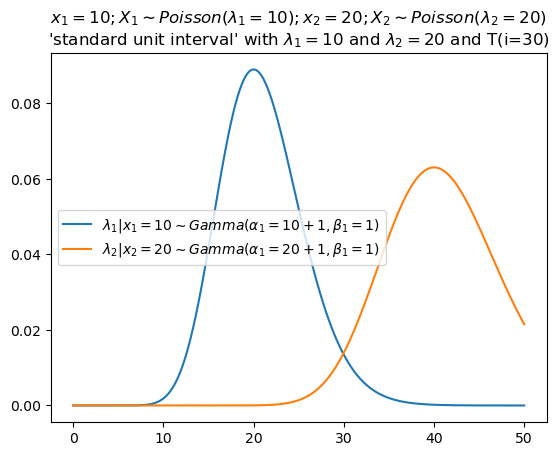

In [229]:
# For T factor of 1 so lambda1=10 and lambda2=20
# suppose x1=10 and x2=20
support = np.linspace(0,50,1000)
# scale = 1/rate
plt.plot(support, stats.gamma(a=20+1, scale=1).pdf(support), label="$\\lambda_1|x_1=10 \\sim Gamma(\\alpha_1=10+1, \\beta_1=1)$")
plt.plot(support, stats.gamma(a=40+1, scale=1).pdf(support), label="$\\lambda_2|x_2=20 \\sim Gamma(\\alpha_1=20+1, \\beta_1=1)$")
plt.title("$x_1=10; X_1\\sim Poisson(\\lambda_1=10); x_2=20; X_2\\sim Poisson(\\lambda_2=20)$\n'standard unit interval' with $\\lambda_1=10$ and $\\lambda_2=20$ and T(i=30)"); plt.legend();

What is $\Pr(\lambda_{1T(i)} < \lambda_{2T(i)} | X_{1T(i)}, X_{2T(i)})$ ? Or maybe first... 
What is $p(\lambda_{1T(i)}, \lambda_{2T(i)} | X_{1T(i)}, X_{2T(i)})$ ?

What is the distribution of $p(\lambda_{1T(i)} < \lambda_{2T(i)} | X_{1T(i)}, X_{2T(i)})$ ?

In [227]:
np.c_[stats.gamma(a=10+1, scale=1).rvs(10000),stats.gamma(a=20+1, scale=1).rvs(10000)]

array([[11.5269752 , 17.54989759],
       [15.09377719, 20.43800074],
       [ 9.48165372, 24.89620141],
       ...,
       [13.66770716, 19.97166687],
       [10.59498944, 18.88723628],
       [ 9.94186164, 18.90687024]])

In [228]:
(stats.gamma(a=10+1, scale=1).rvs(10000)<stats.gamma(a=20+1, scale=1).rvs(10000)).mean()

0.9632

In [230]:
(stats.gamma(a=2+1, scale=1).rvs(10000)<stats.gamma(a=4+1, scale=1).rvs(10000)).mean()

0.766

What is the distribution of $p\left(\frac{\lambda_{1T(i)}}{\lambda_{2T(i)}} | X_{1T(i)}, X_{2T(i)}\right)$ ? 

What is the distribution of $p\left(\lambda_{2T(i)} - \lambda_{1T(i)} | X_{1T(i)}, X_{2T(i)}\right)$ ? 

What is the distribution of $p\left(\frac{\lambda_{2T(i)} - \lambda_{1T(i)}}{n} | X_{1T(i)}, X_{2T(i)}\right)$ ? 

Can you provide intervals estimating these (parameter) random variables?

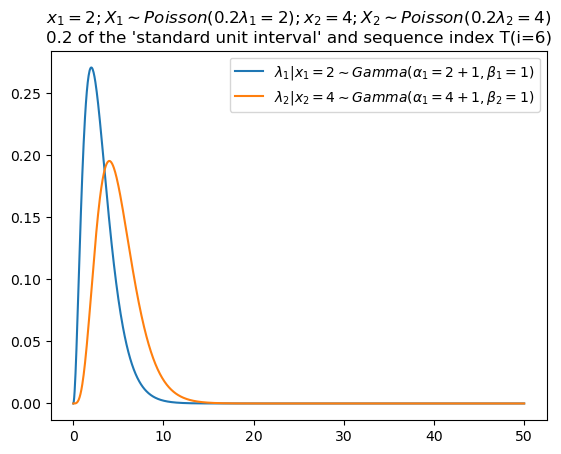

In [105]:
# For T factor of 0.2 so lambda_1T=10*0.1=2 and lambda_2T=20*0.1=4
# suppose x1=2 and x2=4
support = np.linspace(0,50,1000)
# scale = 1/rate
plt.plot(support, stats.gamma(a=2+1, scale=1).pdf(support), label="$\\lambda_1|x_1=2 \\sim Gamma(\\alpha_1=2+1, \\beta_1=1)$")
plt.plot(support, stats.gamma(a=4+1, scale=1).pdf(support), label="$\\lambda_2|x_2=4 \\sim Gamma(\\alpha_1=4+1, \\beta_2=1)$")
plt.title("$x_1=2; X_1\\sim Poisson(0.2\\lambda_1=2); x_2=4; X_2\\sim Poisson(0.2\\lambda_2=4)$\n0.2 of the 'standard unit interval' and sequence index T(i=6)"); plt.legend();

What is the distribution of $p(\lambda_{1T(i)} < \lambda_{2T(i)} | X_{1T(i)}, X_{2T(i)})$ ?

What is the distribution of $p\left(\frac{\lambda_{1T(i)}}{\lambda_{2T(i)}} | X_{1T(i)}, X_{2T(i)}\right)$ ? 

Did this increase or decrease $\Pr(\lambda_{1T(i)} < \lambda_{2T(i)} | X_{1T(i)}, X_{2T(i)})$ ?

How can be help ourselves increase $\Pr(\lambda_{1T(i)} < \lambda_{2T(i)} | X_{1T(i)}, X_{2T(i)})$ ?

What's the problem with the shorter interval length?

What's the general difference between examining 

relative differences $p\left(\frac{\lambda_{1T(i)}}{\lambda_{2T(i)}} | X_{1T(i)}, X_{2T(i)}\right)$ versus

absolute differences $p\left(\lambda_{2T(i)} - \lambda_{1T(i)} | X_{1T(i)}, X_{2T(i)}\right)$ or  $p\left(\frac{\lambda_{2T(i)} - \lambda_{1T(i)}}{n} | X_{1T(i)}, X_{2T(i)}\right)$ for short interval lengths?

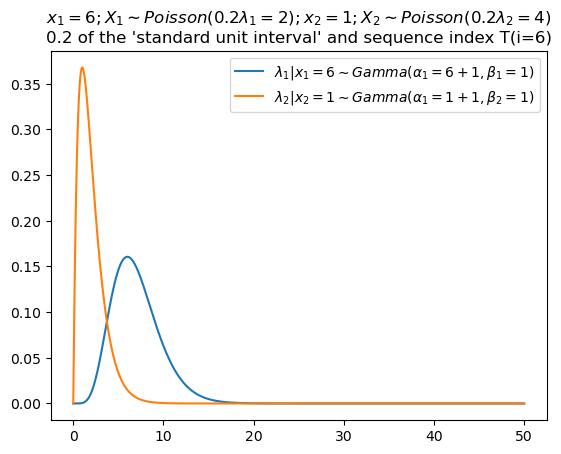

In [106]:
# For T factor of 0.2 so lambda_1T=10*0.1=2 and lambda_2T=20*0.1=4
# BUT INSTEAD suppose x1=6 and x2=1
support = np.linspace(0,50,1000)
# scale = 1/rate
plt.plot(support, stats.gamma(a=6+1, scale=1).pdf(support), label="$\\lambda_1|x_1=6 \\sim Gamma(\\alpha_1=6+1, \\beta_1=1)$")
plt.plot(support, stats.gamma(a=1+1, scale=1).pdf(support), label="$\\lambda_2|x_2=1 \\sim Gamma(\\alpha_1=1+1, \\beta_2=1)$")
plt.title("$x_1=6; X_1\\sim Poisson(0.2\\lambda_1=2); x_2=1; X_2\\sim Poisson(0.2\\lambda_2=4)$\n0.2 of the 'standard unit interval' and sequence index T(i=7)"); plt.legend();

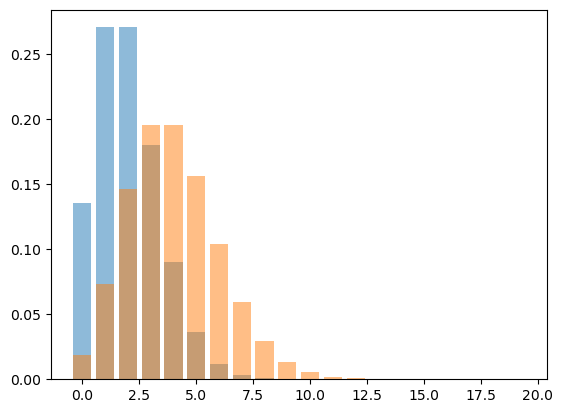

In [231]:
n=10000; lambda1 = 2; lambda2 = 4
support = np.arange(0,20,dtype=int)
plt.bar(x=support, height=stats.poisson(mu=lambda1).pmf(support), alpha=0.5)
plt.bar(x=support, height=stats.poisson(mu=lambda2).pmf(support), alpha=0.5);

Sample from $X \sim $Bernoulli$\left(p=\frac{1}{3}\right)$ using ***symmetric*** proposal distribution $\tilde X \sim $Bernoulli$\left(p=\frac{1}{2}\right)$.

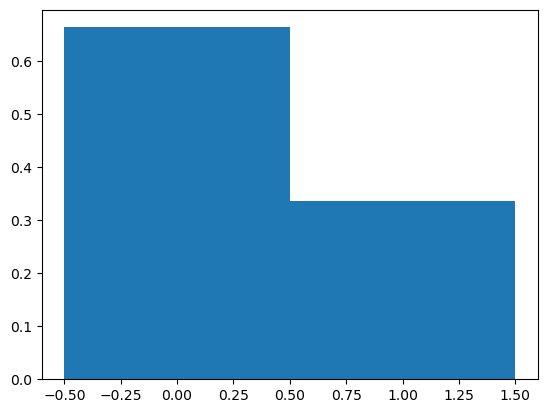

In [154]:
n = 1000
plt.hist(stats.bernoulli(p=1/3).rvs(n), density=True, bins=[-0.5,0.5,1.5]);

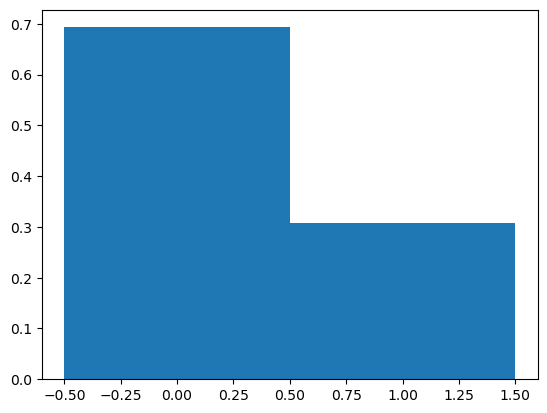

In [162]:
p = stats.bernoulli(p=1/3)
p_tilde = stats.bernoulli(p=1/2)

xs = np.zeros(n)
for step in range(1,n):
    x_tilde = p_tilde.rvs(1)
    p_accept = min(1, (p.pmf(x_tilde)/p.pmf(xs[step-1]))*(p_tilde.pmf(xs[step-1])/p_tilde.pmf(x_tilde)))
    if stats.uniform().rvs(1) < p_accept:
        xs[step] = x_tilde[0]
    else:
        xs[step] = xs[step-1]

plt.hist(xs, density=True, bins=[-0.5,0.5,1.5]);

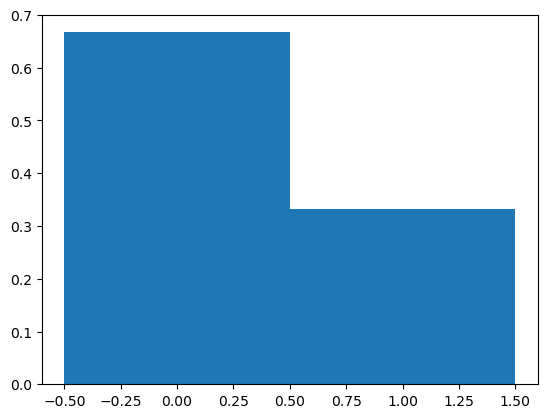

In [167]:
xs = np.zeros(n)
for step in range(1,n):
    #x_tilde = p_tilde.rvs(1)

    # Pr(xs[step]=0 | xs[step-1]=0) 
    # = Pr(xs[step]=0 | x_tilde=0, xs[step-1]=0)*Pr(x_tilde=0 | xs[step-1]=0)
    # + Pr(xs[step]=0 | x_tilde=1, xs[step-1]=0)*Pr(x_tilde=1 | xs[step-1]=0)
    # = 1*0.5 + (1-(1/3)/(2/3))*0.5 = 0.75
    # 
    # Pr(xs[step]=1 | xs[step-1]=0) = 1-0.75
    if xs[step-1]==0:
        if stats.uniform().rvs(1)<0.75:
            xs[step]=0
        else:
            xs[step]=1
    # Pr(xs[step]=1 | xs[step-1]=1) 
    # = Pr(xs[step]=1 | x_tilde=0, xs[step-1]=1)*Pr(x_tilde=0 | xs[step-1]=1)
    # + Pr(xs[step]=1 | x_tilde=1, xs[step-1]=1)*Pr(x_tilde=1 | xs[step-1]=1)
    # = 0*0.5 + 1*0.5 = 0.5
    # 
    # Pr(xs[step]=0 | xs[step-1]=1) = 1-0.5          
    else: # xs[step-1]==1
        if stats.uniform().rvs(1)<0.5:
            xs[step]=1
        else:
            xs[step]=0

plt.hist(xs, density=True, bins=[-0.5,0.5,1.5]);